<e_obs,1>= -0.0009078654237963353
var_obs,1= 0.08291607796958812
<e_obs,2>= -0.0001379979674661454
var_obs,2= 0.08300854105695264
<gamma1>= -0.00091829470320332
var_gamma1= 0.08189245090950496
<gamma2>= -0.00014657528904667407
var_gamma2= 0.08199647687837139


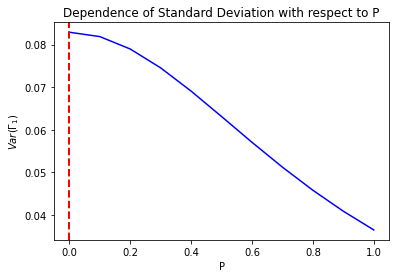

In [ ]:
# Import libraries

from astropy.io import fits
import os
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Go to current working directory and get the KiDS mock catalog

os.chdir('/home/stamou/Downloads/KiDS450_download_dir')
catalog=fits.open('GalCatalog_LOS1.fits')[1].data

# Isolate shear and observed ellipticity from the catalog

shearfull=np.loadtxt('shear_list.txt')
eobsfull=np.loadtxt('eobs_list.txt') 

# Get the components for shear and ellipticity separately

shear1=[shearfull[i][0] for i in range(3070800)]
shear2=[shearfull[i][1] for i in range(3070800)]
eobs1=[eobsfull[i][0] for i in range(3070800)]
eobs2=[eobsfull[i][1] for i in range(3070800)]
eint1=[eobs1[i]-shear1[i] for i in range(3070800)]
eint2=[eobs2[i]-shear2[i] for i in range(3070800)]

# Our goal is to measure shear by using the optimal and usual estimator.
# The usual estimator is just the average of the observed ellipticity.
# Therefore, let us start with that

av_eobs1=np.mean(eobs1)
av_eobs2=np.mean(eobs2)
var_eobs1=statistics.pvariance(eobs1)
var_eobs2=statistics.pvariance(eobs2)
print("<e_obs,1>=",av_eobs1)
print("var_obs,1=",var_eobs1)
print("<e_obs,2>=",av_eobs2)
print("var_obs,2=",var_eobs2)

# Let us now work with the optimal estimator, which depends on the values of \sigma_{p} and P
# We choose sp=0.25 and we'll play with the parameter P
# We want to see if the variance of the optimal is smaller or larger than the variance of the usual estimator and of course check if the average value gives the average of the observed ellipticity
# We start by assuming of course correlation between polarization and intrinsic ellipticity

sp=0.25
se=0.25
noise=np.random.normal(0,sp,3070800)

# Define the correlation between polarization and intrinsic ellipticity

def pol1(P):
    pol1=[P*eint1[i]+noise[i] for i in range(3070800)]
    return pol1
def pol2(P):
    pol2=[P*eint2[i]+noise[i] for i in range(3070800)]
    return pol2

# We now define the optimal estimator

def gamma1(P):
    gamma1=[eobs1[i]-((P*se**2)/((P**2)*(se**2)+sp**2))*(P*eint1[i]+noise[i]) for i in range(3070800)]
    return gamma1
def gamma2(P):
    gamma2=[eobs2[i]-((P*se**2)/((P**2)*(se**2)+sp**2))*(P*eint2[i]+noise[i]) for i in range(3070800)]
    return gamma2

# Next, we calculate the average of the optimal estimator and its variance for P=0.1

av_gamma1=np.mean(gamma1(P=0.1))
var_gamma1=statistics.pvariance(gamma1(P=0.1))
av_gamma2=np.mean(gamma2(P=0.1))
var_gamma2=statistics.pvariance(gamma2(P=0.1))
print("<gamma1>=",av_gamma1)
print("var_gamma1=",var_gamma1)
print("<gamma2>=",av_gamma2)
print("var_gamma2=",var_gamma2)

# Finally, we plot the dependence of the standard deviation of both Gamma_1 and Gamma_2 on the value of P

# For Gamma_1
x_plot = []
y_plot = []
for P in np.linspace(0,1,11):
    x_plot.append(P)
    y_plot.append(statistics.pvariance(gamma1(P)))
plt.plot(x_plot,y_plot, color='blue')
plt.xlabel("P")
plt.ylabel(r'$Var(\Gamma_{1})$')
plt.axvline(linewidth=2, linestyle ="--",color ='red')
plt.title("Dependence of Standard Deviation with respect to P")
plt.show()

# For Gamma_2

xplot = []
yplot = []
for P in np.linspace(0,1,11):
    xplot.append(P)
    yplot.append(statistics.pvariance(gamma2(P)))
plt.plot(xplot,yplot, color='blue')
plt.xlabel("P")
plt.ylabel(r'$Var(\Gamma_{2})$')
plt.axvline(linewidth=2, linestyle ="--",color ='red')
plt.title("Dependence of Standard Deviation with respect to P")
plt.show()